In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Our JSON format can be directly read into a Pandas dataframe.

In [10]:
df = pd.read_json('example.json')
df

,fromAddress,toAddress
0,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,None
1,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,None
2,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,0x9850711951a84ef8a2a31a7868d0dca34b0661ca
3,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,0x9849379b89ab24c18c8871d56d1ad41e00d9eaae
4,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,0x9849379b89ab24c18c8871d56d1ad41e00d9eaae
...,...,...
165,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,0xe8958c0556a005cc10b3dac4144b2358b28e2aaa
166,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,0xe8958c0556a005cc10b3dac4144b2358b28e2aaa
167,0xd748bf41264b906093460923169643f45bdbc32e,0xe8958c0556a005cc10b3dac4144b2358b28e2aaa
168,0xd748bf41264b906093460923169643f45bdbc32e,0xe8958c0556a005cc10b3dac4144b2358b28e2aaa


Basic undirected graph from a dataframe.

In [12]:
g = nx.from_pandas_edgelist(df, 'fromAddress', 'toAddress')
g

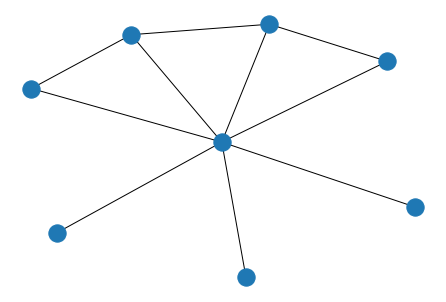

In [13]:
nx.draw(g)

We can also use the degree of connectivity

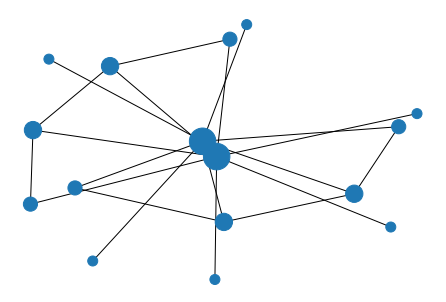

In [6]:
d = dict(g.degree)
nx.draw(g, nodelist=d.keys(), node_size=[v * 100 for v in d.values()])
plt.show()

Now let's try to visualize SC interactions!

In [35]:
df = pd.read_json('bloxberg.json')
df

,timestamp,fromAddress,fromAddressLabel,toAddress,toAddressLabel
0,2020-06-04 13:26:35,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,USERORVALIDATOR,0xe5a9654c7e190701016ebf18206020bf16d8beab,SMARTCONTRACT
1,2020-06-04 13:41:35,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,USERORVALIDATOR,0xe5a9654c7e190701016ebf18206020bf16d8beab,SMARTCONTRACT
2,2020-06-04 13:42:20,0xaa84378fa41da83a9b6523ba46e45a664fbebfc8,USERORVALIDATOR,0x19e51afd3efa98a6e4b82d3834de174d7a33f9b5,SMARTCONTRACT
3,2020-06-04 13:54:40,0x2a0b58ae4347d87b1c7cd6feb2e3a654b69655dd,USERORVALIDATOR,0xd9362cfa076d4b5ff4b093fd19e95a7d04c1dc00,SMARTCONTRACT
4,2020-06-04 13:56:30,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,USERORVALIDATOR,0xe5a9654c7e190701016ebf18206020bf16d8beab,SMARTCONTRACT
...,...,...,...,...,...
660,2020-06-08 04:08:10,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,USERORVALIDATOR,0xe5a9654c7e190701016ebf18206020bf16d8beab,SMARTCONTRACT
661,2020-06-08 04:23:20,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,USERORVALIDATOR,0xe5a9654c7e190701016ebf18206020bf16d8beab,SMARTCONTRACT
662,2020-06-08 04:38:15,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,USERORVALIDATOR,0xe5a9654c7e190701016ebf18206020bf16d8beab,SMARTCONTRACT
663,2020-06-08 04:53:15,0xab59a1ea1ac9af9f77518b9b4ad80942ade35088,USERORVALIDATOR,0xe5a9654c7e190701016ebf18206020bf16d8beab,SMARTCONTRACT


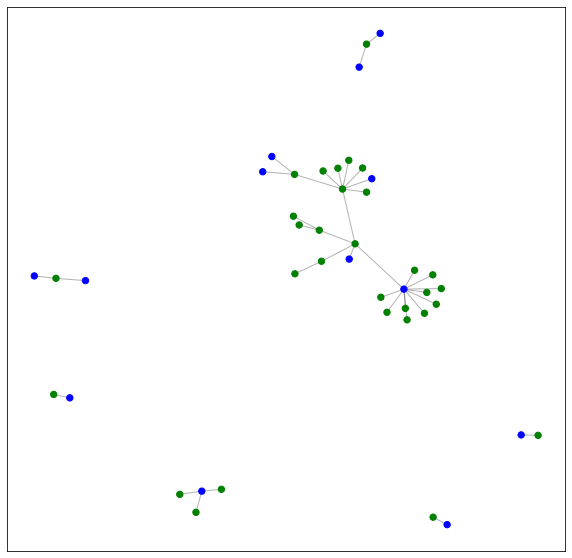

In [43]:
smart_contracts = pd.Series(df.loc[df.toAddressLabel == "SMARTCONTRACT"].toAddress).unique()

g = nx.from_pandas_edgelist(df, 'fromAddress', 'toAddress', ['toAddressLabel'])

# color the nodes in the order they appear
# a bit brute force, but works ¯\_(ツ)_/¯
color_list = []
for node in g.nodes():
    if node in smart_contracts:
        color_list.append('blue')
    else:
        color_list.append('green')

pos = nx.spring_layout(g)
plt.figure(3,figsize=(10, 10)) 
nx.draw_networkx_nodes(g, pos, node_color=color_list, node_size=40)
nx.draw_networkx_edges(g, pos, alpha=0.3)

        

Let's play the same game for some transaction from the Ethereum mainnet

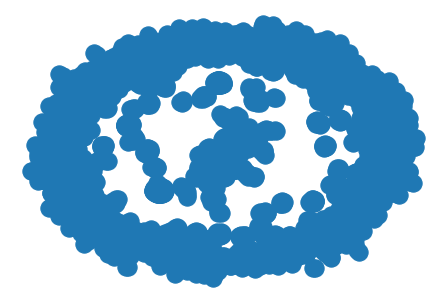

In [44]:
df = pd.read_json('ethereum.json')
g = nx.from_pandas_edgelist(df, 'fromAddress', 'toAddress')
nx.draw(g)

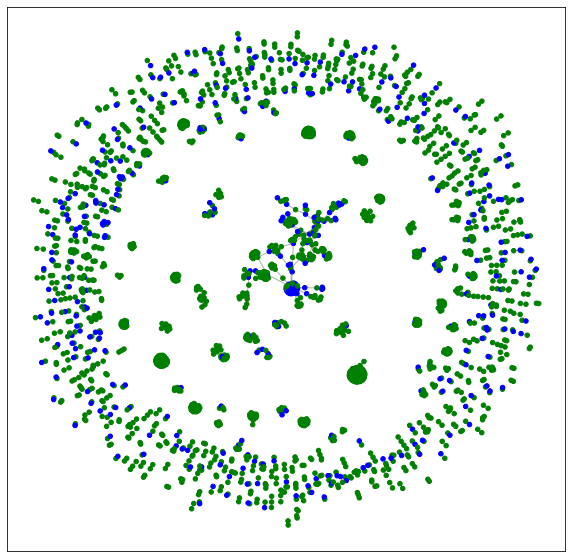

In [46]:
smart_contracts = pd.Series(df.loc[df.toAddressLabel == "SMARTCONTRACT"].toAddress).unique()

g = nx.from_pandas_edgelist(df, 'fromAddress', 'toAddress', ['toAddressLabel'])

# color the nodes in the order they appear
# a bit brute force, but works ¯\_(ツ)_/¯
color_list = []
for node in g.nodes():
    if node in smart_contracts:
        color_list.append('blue')
    else:
        color_list.append('green')

pos = nx.spring_layout(g)
plt.figure(3,figsize=(10, 10)) 
nx.draw_networkx_nodes(g, pos, node_color=color_list, node_size=20)
nx.draw_networkx_edges(g, pos, alpha=0.3)
